<a href="https://colab.research.google.com/github/mukaseevru/ds-school/blob/main/HW2/%D0%91%D0%BE%D0%BB%D1%8C%D1%88%D0%BE%D0%B5_%D0%94%D0%97_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="text-align: center;"><b>Большое домашнее задание 2. Участие в соревнованиях на Kaggle. Работа с нерепрезентативными данными.
</b></h2>

ДЗ в колабе: https://colab.research.google.com/drive/18Hi97eESCrXYht-7SIoj_19pwcZhl17Y?usp=sharing

В этом домашнем задании нам нужно применить в реальном соревновании накопленные знания по машинному обучению и анализу данных!

- Нужно будет провести предобработку [данных с Kaggle](https://www.kaggle.com/sid321axn/thoraric-surgery). Затем нужно будет предсказать колонку DGN (диагноз). Это задача классификации. 
- Описание датасета (что значит признаки): https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data 
- Не забудьте провести анализ данных перед тем, как применять ML-модели! Вам нужно сначала понять, с чем Вы имеете дело, поискать зависимости в данных, понять природу этих зависимостей, и только после этого уже подбирать алгоритмы. Данные с подвохом! Внимательно смотрите на распределения признаков в каждом из классов!
- В качестве основы можно использовать наработки с занятий. Необходимо попробовать сделать аугментацию данных, т.к. данных очень мало, для обучения содержательных моделей их не хватит.
- Попробуйте kNN, логистическую регрессию, SVM. Поэкспериментируйте с добавлением композитных признаков (например, полиномиальных), выбором ядра (для SVM). Подберите гиперпараметры по кросс-валидации (GridSearchCV или RandomSearchCV, второй вариант предпочтительнее).  
- Достичь идеального качества Вам не удастся, да и гнаться за этим не стоит. Гораздо важнее провести вдумчивый анализ и показать, что Вы разобрались в теме.

**Правила:**

- **Дедлайн один:** 29 января 23:59. Решения, отправленные позже, проверяться не будут, кроме случаев наличия уважительной причины.



Решения, размещенные на каких-либо интернет-ресурсах, не принимаются.
 При написании кода придерживайтесь `pep8` и используйте `type hints`.

**После жесткого дедлайна задания не принимаются. Так как дальше будет работа только над проектом**

# **Информация о датасете**
1. DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1) 
2. PRE4: Forced vital capacity - FVC (numeric) 
3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric) 
4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0) 
5. PRE7: Pain before surgery (T,F) 
6. PRE8: Haemoptysis before surgery (T,F) 
7. PRE9: Dyspnoea before surgery (T,F) 
8. PRE10: Cough before surgery (T,F) 
9. PRE11: Weakness before surgery (T,F) 
10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13) 
11. PRE17: Type 2 DM - diabetes mellitus (T,F) 
12. PRE19: MI up to 6 months (T,F) 
13. PRE25: PAD - peripheral arterial diseases (T,F) 
14. PRE30: Smoking (T,F) 
15. PRE32: Asthma (T,F) 
16. AGE: Age at surgery (numeric) 
17. Risk1Y: 1 year survival period - (T)rue value if died (T,F) 

**Class Distribution:** the class value (Risk1Y) is binary valued.

Risk1Y Value: Number of Instances: 
- T 70 
- N 400 

**Summary Statistics:**
Binary Attributes Distribution: 
1. PRE7 Value: Number of Instances: 
- T 31 
- N 439 
2. PRE8 Value: Number of Instances: 
- T 68 
- N 402 
3. PRE9 Value: Number of Instances: 
- T 31 
- N 439 
4. PRE10 Value: Number of Instances: 
- T 323 
- N 147 
5. PRE11 Value: Number of Instances: 
- T 78 
- N 392 
6. PRE17 Value: Number of Instances: 
- T 35 
- N 435 
7. PRE19 Value: Number of Instances: 
- T 2 
- N 468 
8. PRE25 Value: Number of Instances: 
- T 8 
- N 462 
9. PRE30 Value: Number of Instances: 
- T 386 
- N 84 
10. PRE32 Value: Number of Instances: 
- T 368 
- N 2 

**Nominal Attributes Distribution:**
DGN Value: Number of Instances: 
1. DGN3 349
2. DGN2 52
3. DGN4 47
4. DGN6 4
5. DGN5 15
6. DGN8 2
7. DGN1 1

PRE6 Value: Number of Instances: 
1. PRZ2 27 
2. PRZ1 313 
3. PRZ0 130 

PRE14 Value: Number of Instances: 
1. OC11 177 
2. OC14 17 
3. OC12 257 
4. OC13 19 

**Numeric Attributes Statistics:**
Min Max Mean SD 
1. PRE4: 1.4 6.3 3.3 0.9 
2. PRE5: 0.96 86.3 4.6 11.8 
3. AGE: 21 87 52.5 8.7

# Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale, LabelEncoder, PolynomialFeatures
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Определение используемых функций

In [2]:
# Функция определения выбросов
def get_outliners(column):
    median = df[column].median()
    quan25 = df[column].quantile(0.25)
    quan75 = df[column].quantile(0.75)
    IQR = quan75 - quan25
    left = quan25 - 1.5*IQR,
    right = quan75 + 1.5*IQR
    print(f"Границы выбросов для столбца '{column}': [{left}, {right}]")

# Загрузка и предобработка данных

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mukaseevru/ds-school/main/HW2/data/ThoraricSurgery.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


In [4]:
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


Удаляем столбец 'id', т.к. он не несет смысловой нагрузки

In [5]:
df = df.drop('id', axis=1)

В датасете всего 3 числовых признака

In [6]:
df.describe()

,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000
mean,3.281638,4.568702,62.534043
std,0.871395,11.767857,8.706902
min,1.440000,0.960000,21.000000
25%,2.600000,1.960000,57.000000
50%,3.160000,2.400000,62.000000
75%,3.807500,3.080000,69.000000
max,6.300000,86.300000,87.000000


Целевая переменная - категориальная. Классы не сбалансированы

In [7]:
df['DGN'].value_counts()

DGN3    349
DGN2     52
DGN4     47
DGN5     15
DGN6      4
DGN8      2
DGN1      1
Name: DGN, dtype: int64

Преобразовываем наименования классов в категориальных признаках в тип 'int'

In [8]:
df['DGN'] = df['DGN'].str.replace('DGN','').astype('int')
df['DGN'].unique()

array([2, 3, 4, 8, 5, 6, 1])

In [9]:
df['PRE6'].value_counts()

PRZ1    313
PRZ0    130
PRZ2     27
Name: PRE6, dtype: int64

In [10]:
df['PRE6'] = df['PRE6'].str.replace('PRZ','').astype('int')
df['PRE6'].unique()

array([1, 0, 2])

In [11]:
df['PRE14'].value_counts()

OC12    257
OC11    177
OC13     19
OC14     17
Name: PRE14, dtype: int64

In [12]:
df['PRE14'] = df['PRE14'].str.replace('OC1','').astype('int')
df['PRE14'].unique()

array([4, 2, 1, 3])

Категориальные признаки со значениями T/F певодим в 'int' 1/0

In [13]:
object_columns = df.select_dtypes(include='object').columns.values
df[object_columns] = df[object_columns].replace('F','0').replace('T','1').astype('int')
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    int64  
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    int64  
 4   PRE7     470 non-null    int64  
 5   PRE8     470 non-null    int64  
 6   PRE9     470 non-null    int64  
 7   PRE10    470 non-null    int64  
 8   PRE11    470 non-null    int64  
 9   PRE14    470 non-null    int64  
 10  PRE17    470 non-null    int64  
 11  PRE19    470 non-null    int64  
 12  PRE25    470 non-null    int64  
 13  PRE30    470 non-null    int64  
 14  PRE32    470 non-null    int64  
 15  AGE      470 non-null    int64  
 16  Risk1Yr  470 non-null    int64  
dtypes: float64(2), int64(15)
memory usage: 62.5 KB


Посмотрим на распределение классов в признаках и целевой переменной

Text(0.5, 0, 'classes')

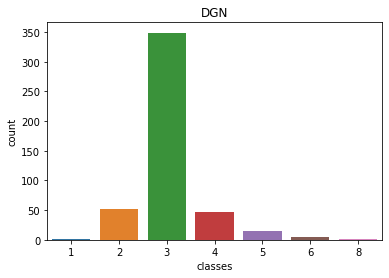

In [15]:
ax = sns.countplot(x='DGN', data=df)
ax.set_title('DGN')
ax.set_ylabel('count')
ax.set_xlabel('classes')

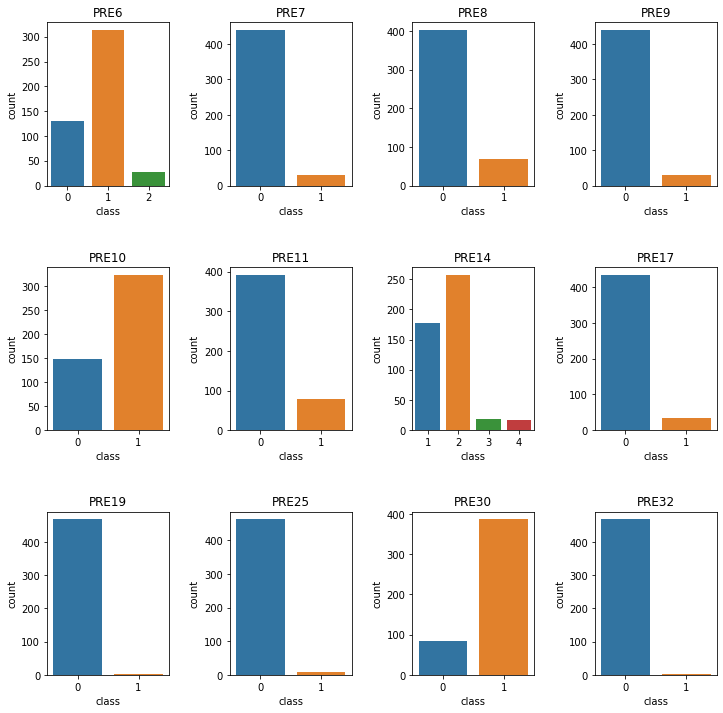

In [16]:
fig, ax = plt.subplots(3,4, figsize=(12,12))
sns.countplot(x='PRE6', data=df, ax=ax[0][0])
ax[0][0].set_title('PRE6')
ax[0][0].set_xlabel('class')

sns.countplot(x='PRE7', data=df, ax=ax[0][1])
ax[0][1].set_title('PRE7')
ax[0][1].set_xlabel('class')

sns.countplot(x='PRE8', data=df, ax=ax[0][2])
ax[0][2].set_title('PRE8')
ax[0][2].set_xlabel('class')

sns.countplot(x='PRE9', data=df, ax=ax[0][3])
ax[0][3].set_title('PRE9')
ax[0][3].set_xlabel('class')

sns.countplot(x='PRE10', data=df, ax=ax[1][0])
ax[1][0].set_title('PRE10')
ax[1][0].set_xlabel('class')

sns.countplot(x='PRE11', data=df, ax=ax[1][1])
ax[1][1].set_title('PRE11')
ax[1][1].set_xlabel('class')

sns.countplot(x='PRE14', data=df, ax=ax[1][2])
ax[1][2].set_title('PRE14')
ax[1][2].set_xlabel('class')

sns.countplot(x='PRE17', data=df, ax=ax[1][3])
ax[1][3].set_title('PRE17')
ax[1][3].set_xlabel('class')

sns.countplot(x='PRE19', data=df, ax=ax[2][0])
ax[2][0].set_title('PRE19')
ax[2][0].set_xlabel('class')

sns.countplot(x='PRE25', data=df, ax=ax[2][1])
ax[2][1].set_title('PRE25')
ax[2][1].set_xlabel('class')

sns.countplot(x='PRE30', data=df, ax=ax[2][2])
ax[2][2].set_title('PRE30')
ax[2][2].set_xlabel('class')

sns.countplot(x='PRE32', data=df, ax=ax[2][3])
ax[2][3].set_title('PRE32')
ax[2][3].set_xlabel('class')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c104864a8>,
      dtype=object)

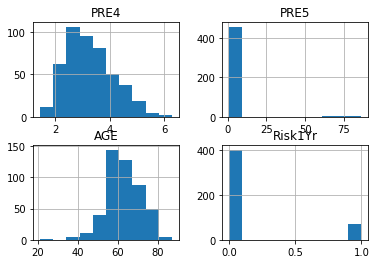

In [17]:
df[['PRE4', 'PRE5', 'AGE', 'Risk1Yr']].hist()

In [18]:
df.describe()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,3.095745,3.281638,4.568702,0.780851,0.065957,0.144681,0.065957,0.687234,0.165957,1.736170,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,0.722309,0.871395,11.767857,0.535375,0.248472,0.352154,0.248472,0.464114,0.372439,0.702243,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,3.000000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.807500,3.080000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,86.300000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


Определим выбросы в числовых признаках

In [19]:
get_outliners('PRE4')

Границы выбросов для столбца 'PRE4': [(0.7887500000000001,), 5.61875]


In [20]:
df[(df['PRE4'] < 0.7887500000000001) | (df['PRE4'] > 5.61875)]

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
73,4,6.30,5.48,0,0,0,0,0,0,1,0,0,0,0,0,45,0
93,3,6.08,4.92,0,0,0,0,0,0,1,0,0,0,1,0,50,0


In [21]:
get_outliners('PRE5')

Границы выбросов для столбца 'PRE5': [(0.2799999999999998,), 4.76]


In [22]:
df[(df['PRE5'] < 0.2799999999999998) | (df['PRE5'] > 4.76)]

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
25,5,4.56,72.80,0,1,1,0,1,0,2,0,0,0,1,0,57,0
73,4,6.30,5.48,0,0,0,0,0,0,1,0,0,0,0,0,45,0
89,3,2.83,66.40,1,1,1,1,1,0,2,0,0,0,1,0,75,0
93,3,6.08,4.92,0,0,0,0,0,0,1,0,0,0,1,0,50,0
98,3,2.63,67.30,1,0,0,1,1,0,1,0,0,0,1,0,54,0
112,3,3.68,64.10,0,0,0,0,0,0,2,0,0,0,1,0,60,0
132,2,2.50,71.10,0,0,0,1,0,0,3,0,0,0,1,0,64,1
215,2,2.66,8.56,1,0,1,0,1,0,2,0,0,0,1,0,61,0
255,3,3.72,78.30,0,1,0,0,1,0,2,0,0,0,1,0,44,0
319,3,2.10,69.10,0,0,0,0,0,0,1,0,0,0,1,0,62,0


Складывается ощущение, что есть ошибка в данных и надо поделить на 10, когда показатель больше 10

In [23]:
df.loc[df['PRE5'] > 10, 'PRE5'] = df.loc[df['PRE5'] > 10, 'PRE5'].apply(lambda x: x/10)
df.loc[df['PRE5'] > 10]

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr


In [24]:
get_outliners('PRE5')

Границы выбросов для столбца 'PRE5': [(0.2799999999999998,), 4.76]


In [25]:
df[(df['PRE5'] < 0.2799999999999998) | (df['PRE5'] > 4.76)]

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
25,5,4.56,7.28,0,1,1,0,1,0,2,0,0,0,1,0,57,0
73,4,6.30,5.48,0,0,0,0,0,0,1,0,0,0,0,0,45,0
89,3,2.83,6.64,1,1,1,1,1,0,2,0,0,0,1,0,75,0
93,3,6.08,4.92,0,0,0,0,0,0,1,0,0,0,1,0,50,0
98,3,2.63,6.73,1,0,0,1,1,0,1,0,0,0,1,0,54,0
112,3,3.68,6.41,0,0,0,0,0,0,2,0,0,0,1,0,60,0
132,2,2.50,7.11,0,0,0,1,0,0,3,0,0,0,1,0,64,1
215,2,2.66,8.56,1,0,1,0,1,0,2,0,0,0,1,0,61,0
255,3,3.72,7.83,0,1,0,0,1,0,2,0,0,0,1,0,44,0
319,3,2.10,6.91,0,0,0,0,0,0,1,0,0,0,1,0,62,0


In [26]:
get_outliners('AGE')

Границы выбросов для столбца 'AGE': [(39.0,), 87.0]


In [27]:
df[(df['AGE'] < 39) | (df['AGE'] > 87)]

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
56,3,3.72,2.88,1,0,0,1,1,0,1,0,0,0,0,0,37,0
325,4,5.03,7.93,1,0,0,1,0,0,1,0,0,0,0,0,38,0
396,3,2.76,2.08,0,0,0,0,0,0,2,0,0,0,0,0,21,0


Уберем только одно значения, когда возраст 21, т.к. это существенный выброс

In [28]:
df.drop((df[df['AGE'] == 21]).index, inplace=True)

In [29]:
df.corr()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
DGN,1.000000,0.121142,0.088754,-0.056443,0.047830,-0.063087,-0.047222,-0.076450,-0.019693,-0.134967,0.029676,-0.008693,-0.017499,-0.108568,-0.008693,0.076812,0.060339
PRE4,0.121142,1.000000,0.562729,-0.093207,0.019455,-0.096407,0.055515,-0.054813,-0.100872,0.034587,-0.115562,-0.009222,-0.035767,-0.014827,-0.060686,-0.303872,-0.046935
PRE5,0.088754,0.562729,1.000000,-0.179949,0.119367,0.003882,0.193976,-0.144067,-0.144943,0.024633,-0.091630,-0.031633,-0.039501,-0.105328,-0.061729,-0.276177,-0.079953
PRE6,-0.056443,-0.093207,-0.179949,1.000000,0.092252,0.122316,0.092252,0.683185,0.417692,0.091143,0.024485,0.026645,0.022808,0.166812,-0.034612,0.205167,0.092124
PRE7,0.047830,0.019455,0.119367,0.092252,1.000000,0.256058,0.067388,-0.025015,-0.072729,0.100178,0.022421,-0.017410,-0.035046,-0.079014,-0.017410,0.043148,0.057153
PRE8,-0.063087,-0.096407,0.003882,0.122316,0.256058,1.000000,0.134187,0.080676,0.060025,0.060190,-0.001720,-0.026949,0.086057,-0.047062,-0.026949,0.084615,0.065442
PRE9,-0.047222,0.055515,0.193976,0.092252,0.067388,0.134187,1.000000,0.049122,-0.072729,0.075733,-0.042893,-0.017410,0.097507,-0.079014,-0.017410,-0.018493,0.105320
PRE10,-0.076450,-0.054813,-0.144067,0.683185,-0.025015,0.080676,0.049122,1.000000,0.201350,0.146901,0.015693,0.043998,0.017440,0.195011,-0.026670,0.138214,0.087760
PRE11,-0.019693,-0.100872,-0.144943,0.417692,-0.072729,0.060025,-0.072729,0.201350,1.000000,-0.035699,0.069273,0.058646,0.029607,0.117088,-0.029229,0.208639,0.086104
PRE14,-0.134967,0.034587,0.024633,0.091143,0.100178,0.060190,0.075733,0.146901,-0.035699,1.000000,0.037599,-0.021960,-0.020752,0.040226,-0.021960,0.020454,0.174765


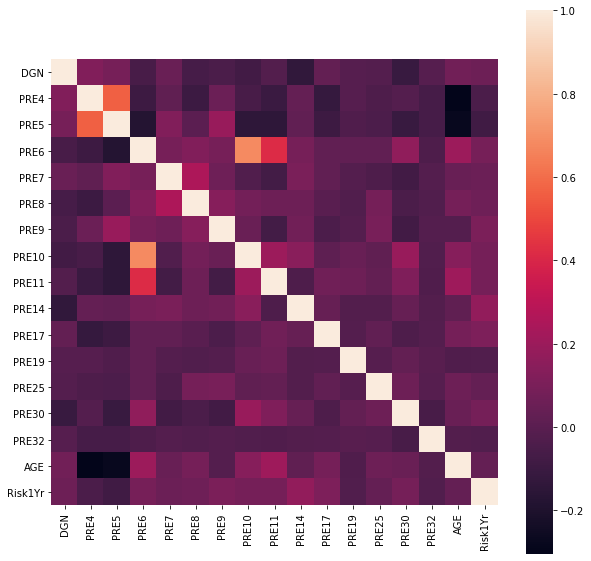

In [30]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), square=True)
plt.show()

In [31]:
X = df.drop('DGN', axis=1)
y = df['DGN']

In [32]:
X.shape, y.shape

((469, 16), (469,))

Добавим полиномиальные признаки в датасет

In [33]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_poly.shape

(469, 153)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=21)

# Модели

## Логистическая регрессия

In [35]:
clf_lr = LogisticRegression(class_weight = 'balanced', max_iter=10000, random_state=21)
clf_lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=21, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [36]:
y_pred = clf_lr.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.14      0.36      0.20        11
           3       0.81      0.36      0.50        72
           4       0.06      0.12      0.08         8
           5       0.09      0.33      0.14         3
           6       0.00      0.00      0.00         0

    accuracy                           0.34        94
   macro avg       0.18      0.20      0.15        94
weighted avg       0.65      0.34      0.42        94



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Плохое качество модели. Попробуем доработать данные

In [37]:
df.DGN.value_counts()

3    348
2     52
4     47
5     15
6      4
8      2
1      1
Name: DGN, dtype: int64

Объединим дигнозы с малым количеством значений в один класс

In [38]:
df.loc[df['DGN'].isin([1, 5, 6, 8]), 'DGN'] = 0

In [39]:
X = df.drop('DGN', axis=1)
y = df['DGN']

In [40]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_poly.shape

(469, 153)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, stratify=y, random_state=21)

Сделаем аугментацию данных

In [42]:
augm = ADASYN()
X_train_augm, y_train_augm = augm.fit_resample(np.array(X_train), np.array(y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [43]:
X_train_augm.shape, y_train_augm.shape

((1113, 153), (1113,))

Теперь классы сбалансированы

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'classes')

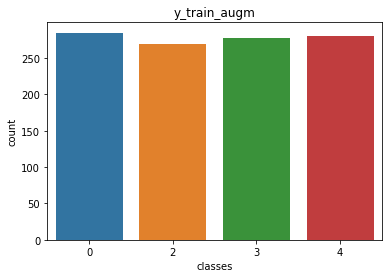

In [44]:
ax = sns.countplot(y_train_augm)
ax.set_title('y_train_augm')
ax.set_ylabel('count')
ax.set_xlabel('classes')

In [45]:
clf_lr = LogisticRegression(max_iter=10000, random_state=21)
clf_lr.fit(X_train_augm, y_train_augm)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=21, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred = clf_lr.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.25      0.14         4
           2       0.12      0.27      0.16        11
           3       0.79      0.47      0.59        70
           4       0.19      0.33      0.24         9

    accuracy                           0.43        94
   macro avg       0.30      0.33      0.28        94
weighted avg       0.62      0.43      0.49        94



Модель работает гораздо лучше

## knn

In [47]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_augm, y_train_augm)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
y_pred = clf_knn.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           2       0.11      0.18      0.13        11
           3       0.72      0.41      0.53        70
           4       0.04      0.11      0.06         9

    accuracy                           0.34        94
   macro avg       0.22      0.18      0.18        94
weighted avg       0.56      0.34      0.41        94



## Random Forest

In [49]:
clf_rfc = RandomForestClassifier(random_state=21)
clf_rfc.fit(X_train_augm, y_train_augm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [50]:
y_pred = clf_rfc.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           2       0.12      0.09      0.11        11
           3       0.76      0.86      0.81        70
           4       0.17      0.11      0.13         9

    accuracy                           0.66        94
   macro avg       0.26      0.26      0.26        94
weighted avg       0.60      0.66      0.62        94



## SVC

In [51]:
svc_lin = SVC(kernel='linear', probability=True)
svc_lin.fit(X_train_augm, y_train_augm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [52]:
y_pred = svc_lin.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.09      0.25      0.13         4
           2       0.09      0.18      0.12        11
           3       0.81      0.50      0.62        70
           4       0.17      0.33      0.22         9

    accuracy                           0.44        94
   macro avg       0.29      0.32      0.27        94
weighted avg       0.64      0.44      0.50        94



In [53]:
svc_rbf = SVC(kernel='rbf', probability=True, gamma=10)
svc_rbf.fit(X_train_augm, y_train_augm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [54]:
y_pred = svc_rbf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.04      1.00      0.08         4
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        70
           4       0.00      0.00      0.00         9

    accuracy                           0.04        94
   macro avg       0.01      0.25      0.02        94
weighted avg       0.00      0.04      0.00        94



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
svc_poly = SVC(kernel='poly', probability=True)
svc_poly.fit(X_train_augm, y_train_augm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [56]:
y_pred = svc_poly.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.01      0.25      0.03         4
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        70
           4       0.04      0.11      0.06         9

    accuracy                           0.02        94
   macro avg       0.01      0.09      0.02        94
weighted avg       0.00      0.02      0.01        94



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## RandomizedSearchCV

Попробуем повысить качество модели Random Forest, т.к. она показала лучший результат

In [57]:
params = {'n_estimators': np.array(np.linspace(100, 1000, 10), dtype='int'),
          'max_features': ['log2', 'sqrt'],
          'max_depth': np.array(np.linspace(1, 20, 20), dtype='int'),
          'min_samples_split': np.array(np.linspace(1, 50, 25), dtype='int'),
          'min_samples_leaf': np.array(np.linspace(1, 50, 25), dtype='int'),
          'bootstrap': [True, False]}
rs_rfc = RandomizedSearchCV(clf_rfc,
                            params,
                            n_iter=1000,
                            cv=5,
                            verbose=1,
                            n_jobs=-1,
                            random_state=21)
rs_rfc.fit(X_train_augm, y_train_augm)
rs_rfc.best_params_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 46.5min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 60.0min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 73.8min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 73.8min finished


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

Для GridSearchCV будем использовать диапазоны, которые рядом с лучшими параметрами из RandomizedSearchCV

In [58]:
params = {'n_estimators': np.array(np.linspace(350, 450, 10), dtype='int'),
          'max_features': ['log2'],
          'max_depth': np.array(np.linspace(14, 16, 3), dtype='int'),
          'min_samples_split': np.array(np.linspace(3, 7, 5), dtype='int'),
          'min_samples_leaf': np.array(np.linspace(1, 3, 3), dtype='int'),
          'bootstrap': [False]}
gs_rfc = GridSearchCV(clf_rfc,
                      params,
                      cv=5,
                      verbose=1,
                      n_jobs=-1)
gs_rfc.fit(X_train_augm, y_train_augm)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed: 30.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [59]:
gs_rfc.best_params_, gs_rfc.best_score_

({'bootstrap': False,
  'max_depth': 16,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 4,
  'n_estimators': 350},
 0.8383913061043105)

In [60]:
final_model = RandomForestClassifier(n_estimators=gs_rfc.best_params_['n_estimators'],
                                     max_features=gs_rfc.best_params_['max_features'],
                                     max_depth=gs_rfc.best_params_['max_depth'],
                                     min_samples_split=gs_rfc.best_params_['min_samples_split'],
                                     min_samples_leaf=gs_rfc.best_params_['min_samples_leaf'],
                                     bootstrap=gs_rfc.best_params_['bootstrap'],
                                     random_state=21)
final_model = final_model.fit(X_train_augm, y_train_augm)

In [61]:
y_pred = final_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           2       0.14      0.09      0.11        11
           3       0.76      0.84      0.80        70
           4       0.12      0.11      0.12         9

    accuracy                           0.65        94
   macro avg       0.26      0.26      0.26        94
weighted avg       0.59      0.65      0.62        94



Лучше других сработала модель Random Forest с подобранными параметрами. Но не все классы целевой переменной удается предсказывать, что связано с малым объемом и качеством данных.